In [1]:
import pandas as pd
import numpy as np
import random
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('../Dataset/Clean Dataset.xlsx') 
df

,label,tweet,clean_data
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jalan jatibarupolisi gertak gubernur emangny p...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewek kayak rasain sibuk jaga rasain sakit hai...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jalan jatibarubagian wilayah tn abangpengatura...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing alam kemarin jam batalin tiket stasiun...
...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",papa mejam mata tahan gejolak batin papa tapu ...
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulit calon wapresnya jokowi pilpres salah gem...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",iya gimana coba lulus seni nari kerja narinari...
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,mahasiswa teknik ui nembak pacar sahur kukus t...


In [3]:
X = df['clean_data'].values.astype('U')
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [4]:
# transformasi data label
encoder = LabelEncoder()
encoder.fit(y)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
    
# term weighting
tfidf = TfidfVectorizer()
tfidf.fit(X)
    
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [5]:
#################### PARAMETERS ####################
W = 0.5
c1 = 0.2
c2 = 0.5

n_iterations = 20
n_particles = 10

In [6]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
    svclassifier.fit(X_train, y_train)
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)   
    return confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0], confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0]

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.1)
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.axis([0,10,0,10])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

iteration : 1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


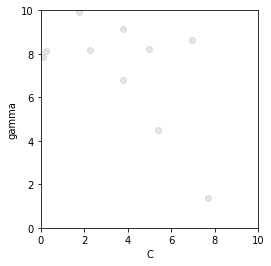

error of particle- 1 is (training, test) (0, 58)  At (gamma, c):  [3.75926128 6.79386307]
error of particle- 2 is (training, test) (0, 60)  At (gamma, c):  [7.66671645 1.37966704]
error of particle- 3 is (training, test) (0, 60)  At (gamma, c):  [5.40074758 4.48727332]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 60)  At (gamma, c):  [6.95902296 8.63889758]
error of particle- 6 is (training, test) (0, 60)  At (gamma, c):  [4.96815589 8.23253282]
error of particle- 7 is (training, test) (0, 28)  At (gamma, c):  [2.24598241 8.15870982]
error of particle- 8 is (training, test) (0, 19)  At (gamma, c):  [1.75906855 9.92103629]
error of particle- 9 is (training, test) (0, 58)  At (gamma, c):  [3.78067457 9.14951671]
error of particle- 10 is (training, test) (2, 11)  At (gamma, c):  [0.24954602 8.12982961]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 0 with error (train, test): (11, 7)
iteration : 2


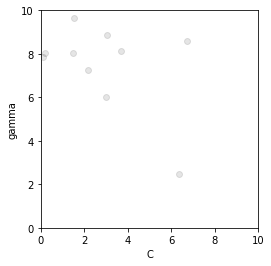

error of particle- 1 is (training, test) (0, 27)  At (gamma, c):  [2.17140616 7.24385037]
error of particle- 2 is (training, test) (0, 60)  At (gamma, c):  [6.36734452 2.48654693]
error of particle- 3 is (training, test) (0, 52)  At (gamma, c):  [2.99962654 6.00034637]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 60)  At (gamma, c):  [6.73912182 8.61311513]
error of particle- 6 is (training, test) (0, 58)  At (gamma, c):  [3.69949387 8.12876932]
error of particle- 7 is (training, test) (0, 15)  At (gamma, c):  [1.46379179 8.040731  ]
error of particle- 8 is (training, test) (0, 17)  At (gamma, c):  [1.52908293 9.63332652]
error of particle- 9 is (training, test) (0, 52)  At (gamma, c):  [3.02649905 8.8805797 ]
error of particle- 10 is (training, test) (3, 11)  At (gamma, c):  [0.20401706 8.04506343]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 1 with error (train, test): (11, 7)
iteration : 3


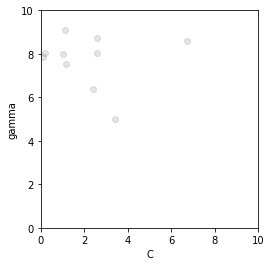

error of particle- 1 is (training, test) (0, 11)  At (gamma, c):  [1.13315442 7.53808383]
error of particle- 2 is (training, test) (0, 54)  At (gamma, c):  [3.41602014 5.00065513]
error of particle- 3 is (training, test) (0, 32)  At (gamma, c):  [2.41358057 6.36964486]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 60)  At (gamma, c):  [6.69449884 8.60788328]
error of particle- 6 is (training, test) (0, 39)  At (gamma, c):  [2.56701485 8.03614419]
error of particle- 7 is (training, test) (0, 11)  At (gamma, c):  [1.00908542 7.97214706]
error of particle- 8 is (training, test) (0, 11)  At (gamma, c):  [1.10290559 9.10018283]
error of particle- 9 is (training, test) (0, 39)  At (gamma, c):  [2.56515815 8.71606676]
error of particle- 10 is (training, test) (3, 11)  At (gamma, c):  [0.19035911 8.01963495]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 2 with error (train, test): (11, 7)
iteration : 4


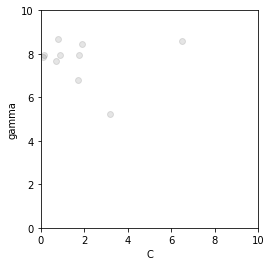

error of particle- 1 is (training, test) (1, 10)  At (gamma, c):  [0.70468702 7.65950857]
error of particle- 2 is (training, test) (0, 54)  At (gamma, c):  [3.16741065 5.21243502]
error of particle- 3 is (training, test) (0, 19)  At (gamma, c):  [1.72042701 6.80643748]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 60)  At (gamma, c):  [6.47817701 8.5825205 ]
error of particle- 6 is (training, test) (0, 19)  At (gamma, c):  [1.74969836 7.96929611]
error of particle- 7 is (training, test) (0, 11)  At (gamma, c):  [0.8894673 7.9541049]
error of particle- 8 is (training, test) (0, 10)  At (gamma, c):  [0.78141783 8.69800478]
error of particle- 9 is (training, test) (0, 20)  At (gamma, c):  [1.88950215 8.4751296 ]
error of particle- 10 is (training, test) (4, 11)  At (gamma, c):  [0.14702307 7.93895157]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 3 with error (train, test): (11, 7)
iteration : 5


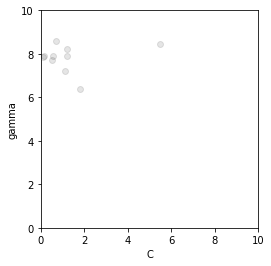

error of particle- 1 is (training, test) (1, 10)  At (gamma, c):  [0.50105598 7.71721622]
error of particle- 2 is (training, test) (0, 19)  At (gamma, c):  [1.81099922 6.36790445]
error of particle- 3 is (training, test) (0, 11)  At (gamma, c):  [1.08523006 7.2067086 ]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 60)  At (gamma, c):  [5.45445593 8.46249367]
error of particle- 6 is (training, test) (0, 11)  At (gamma, c):  [1.18359117 7.92299437]
error of particle- 7 is (training, test) (1, 9)  At (gamma, c):  [0.55864439 7.90420646]
error of particle- 8 is (training, test) (1, 10)  At (gamma, c):  [0.70268193 8.59950694]
error of particle- 9 is (training, test) (0, 11)  At (gamma, c):  [1.21397756 8.23423931]
error of particle- 10 is (training, test) (4, 10)  At (gamma, c):  [0.13296911 7.91278578]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 4 with error (train, test): (11, 7)
iteration : 6


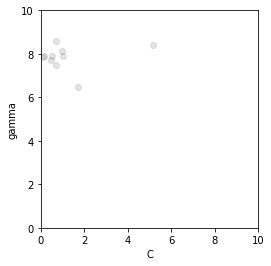

error of particle- 1 is (training, test) (2, 10)  At (gamma, c):  [0.46987909 7.72605153]
error of particle- 2 is (training, test) (0, 20)  At (gamma, c):  [1.69390663 6.46765066]
error of particle- 3 is (training, test) (1, 10)  At (gamma, c):  [0.67538424 7.46497407]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 60)  At (gamma, c):  [5.15759822 8.4276884 ]
error of particle- 6 is (training, test) (0, 11)  At (gamma, c):  [0.99995978 7.90797522]
error of particle- 7 is (training, test) (1, 10)  At (gamma, c):  [0.49505445 7.89461511]
error of particle- 8 is (training, test) (1, 10)  At (gamma, c):  [0.69321573 8.58766483]
error of particle- 9 is (training, test) (0, 11)  At (gamma, c):  [0.98306384 8.15189609]
error of particle- 10 is (training, test) (4, 9)  At (gamma, c):  [0.12134046 7.89113548]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 5 with error (train, test): (11, 7)
iteration : 7


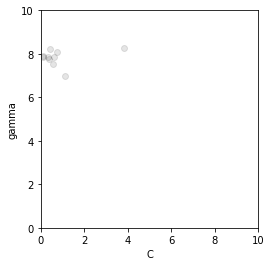

error of particle- 1 is (training, test) (2, 11)  At (gamma, c):  [0.34870255 7.76039214]
error of particle- 2 is (training, test) (0, 11)  At (gamma, c):  [1.08416039 6.98706765]
error of particle- 3 is (training, test) (1, 10)  At (gamma, c):  [0.56522109 7.53439369]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 58)  At (gamma, c):  [3.8355199  8.27268049]
error of particle- 6 is (training, test) (1, 10)  At (gamma, c):  [0.60016068 7.87527576]
error of particle- 7 is (training, test) (2, 11)  At (gamma, c):  [0.30986412 7.86668261]
error of particle- 8 is (training, test) (2, 10)  At (gamma, c):  [0.41613029 8.24103364]
error of particle- 9 is (training, test) (1, 10)  At (gamma, c):  [0.73729615 8.06425598]
error of particle- 10 is (training, test) (4, 10)  At (gamma, c):  [0.11588299 7.88097472]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 6 with error (train, test): (11, 7)
iteration : 8


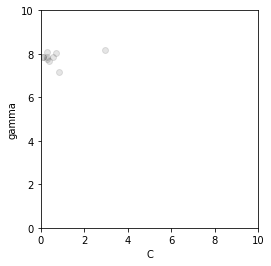

error of particle- 1 is (training, test) (2, 11)  At (gamma, c):  [0.25915018 7.78577067]
error of particle- 2 is (training, test) (1, 10)  At (gamma, c):  [0.85233876 7.18454668]
error of particle- 3 is (training, test) (2, 11)  At (gamma, c):  [0.376056   7.65359659]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 52)  At (gamma, c):  [2.93981774 8.16766333]
error of particle- 6 is (training, test) (1, 10)  At (gamma, c):  [0.57542458 7.87325261]
error of particle- 7 is (training, test) (2, 11)  At (gamma, c):  [0.29254828 7.86407084]
error of particle- 8 is (training, test) (2, 11)  At (gamma, c):  [0.28101211 8.07200212]
error of particle- 9 is (training, test) (1, 10)  At (gamma, c):  [0.67210879 8.04101033]
error of particle- 10 is (training, test) (4, 9)  At (gamma, c):  [0.11273636 7.87511628]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.09042939 7.83358499] in iteration number 7 with error (train, test): (11, 7)
iteration : 9


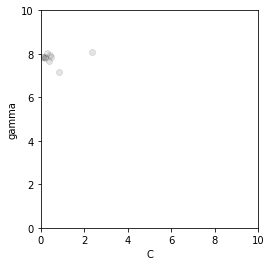

error of particle- 1 is (training, test) (3, 11)  At (gamma, c):  [0.2052241  7.80105295]
error of particle- 2 is (training, test) (1, 10)  At (gamma, c):  [0.85222286 7.1846454 ]
error of particle- 3 is (training, test) (2, 11)  At (gamma, c):  [0.35794988 7.66500621]
error of particle- 4 is (training, test) (11, 7)  At (gamma, c):  [0.09042939 7.83358499]
error of particle- 5 is (training, test) (0, 31)  At (gamma, c):  [2.3664328  8.10043645]
error of particle- 6 is (training, test) (2, 10)  At (gamma, c):  [0.44211477 7.86234923]
error of particle- 7 is (training, test) (3, 11)  At (gamma, c):  [0.198005   7.84981076]
error of particle- 8 is (training, test) (2, 11)  At (gamma, c):  [0.26955175 8.05766532]
error of particle- 9 is (training, test) (2, 10)  At (gamma, c):  [0.39660782 7.94276741]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 8 with error (train, test): (5, 7)
iteration : 10


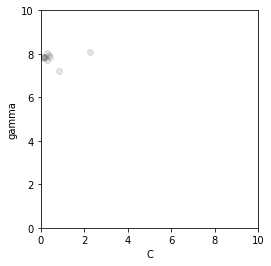

error of particle- 1 is (training, test) (3, 11)  At (gamma, c):  [0.15553063 7.82828059]
error of particle- 2 is (training, test) (1, 10)  At (gamma, c):  [0.81858977 7.21483112]
error of particle- 3 is (training, test) (2, 11)  At (gamma, c):  [0.27183111 7.72988254]
error of particle- 4 is (training, test) (9, 7)  At (gamma, c):  [0.09480198 7.84172592]
error of particle- 5 is (training, test) (0, 27)  At (gamma, c):  [2.24803484 8.08770476]
error of particle- 6 is (training, test) (2, 10)  At (gamma, c):  [0.40143079 7.86171294]
error of particle- 7 is (training, test) (3, 11)  At (gamma, c):  [0.18811118 7.85056448]
error of particle- 8 is (training, test) (2, 11)  At (gamma, c):  [0.26899345 8.0569927 ]
error of particle- 9 is (training, test) (2, 11)  At (gamma, c):  [0.36931224 7.9347974 ]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 9 with error (train, test): (5, 7)
iteration : 11


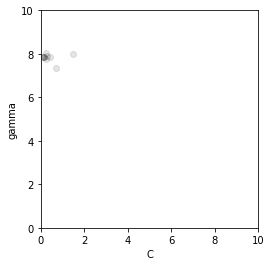

error of particle- 1 is (training, test) (4, 10)  At (gamma, c):  [0.13484844 7.8396126 ]
error of particle- 2 is (training, test) (1, 10)  At (gamma, c):  [0.69034104 7.32993444]
error of particle- 3 is (training, test) (3, 11)  At (gamma, c):  [0.23370045 7.75860772]
error of particle- 4 is (training, test) (7, 7)  At (gamma, c):  [0.09823094 7.84810999]
error of particle- 5 is (training, test) (0, 16)  At (gamma, c):  [1.48632188 8.00579547]
error of particle- 6 is (training, test) (2, 10)  At (gamma, c):  [0.39785039 7.86165694]
error of particle- 7 is (training, test) (3, 11)  At (gamma, c):  [0.16152097 7.85259014]
error of particle- 8 is (training, test) (2, 11)  At (gamma, c):  [0.24635006 8.02971267]
error of particle- 9 is (training, test) (2, 11)  At (gamma, c):  [0.28925213 7.91142069]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 10 with error (train, test): (5, 7)
iteration : 12


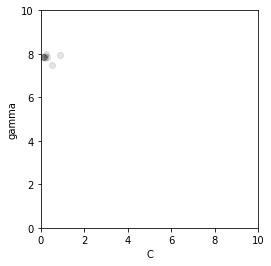

error of particle- 1 is (training, test) (4, 10)  At (gamma, c):  [0.12042981 7.84751273]
error of particle- 2 is (training, test) (2, 10)  At (gamma, c):  [0.50665011 7.49479718]
error of particle- 3 is (training, test) (3, 11)  At (gamma, c):  [0.19512417 7.7876686 ]
error of particle- 4 is (training, test) (6, 7)  At (gamma, c):  [0.10034065 7.85203786]
error of particle- 5 is (training, test) (0, 11)  At (gamma, c):  [0.8639167  7.93886636]
error of particle- 6 is (training, test) (2, 11)  At (gamma, c):  [0.26611346 7.85959659]
error of particle- 7 is (training, test) (4, 11)  At (gamma, c):  [0.1379753  7.85438386]
error of particle- 8 is (training, test) (3, 11)  At (gamma, c):  [0.21138439 7.98758716]
error of particle- 9 is (training, test) (3, 11)  At (gamma, c):  [0.20291735 7.88621186]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 11 with error (train, test): (5, 7)
iteration : 13


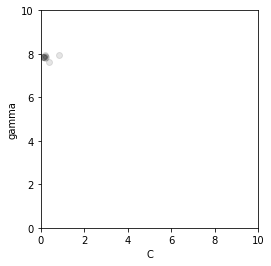

error of particle- 1 is (training, test) (4, 10)  At (gamma, c):  [0.11822214 7.84872234]
error of particle- 2 is (training, test) (2, 11)  At (gamma, c):  [0.36709926 7.62004415]
error of particle- 3 is (training, test) (3, 11)  At (gamma, c):  [0.18483894 7.79541683]
error of particle- 4 is (training, test) (6, 7)  At (gamma, c):  [0.10093694 7.85314804]
error of particle- 5 is (training, test) (0, 10)  At (gamma, c):  [0.83901129 7.93618821]
error of particle- 6 is (training, test) (3, 11)  At (gamma, c):  [0.21727714 7.85883279]
error of particle- 7 is (training, test) (4, 10)  At (gamma, c):  [0.13384318 7.85469865]
error of particle- 8 is (training, test) (3, 11)  At (gamma, c):  [0.19377991 7.96637785]
error of particle- 9 is (training, test) (3, 11)  At (gamma, c):  [0.19994288 7.88534334]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 12 with error (train, test): (5, 7)
iteration : 14


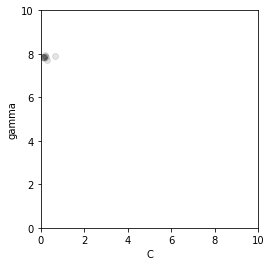

error of particle- 1 is (training, test) (4, 10)  At (gamma, c):  [0.11729669 7.8492294 ]
error of particle- 2 is (training, test) (2, 11)  At (gamma, c):  [0.27882367 7.69927156]
error of particle- 3 is (training, test) (3, 11)  At (gamma, c):  [0.15336711 7.81912568]
error of particle- 4 is (training, test) (6, 7)  At (gamma, c):  [0.10183423 7.85481862]
error of particle- 5 is (training, test) (1, 10)  At (gamma, c):  [0.63485957 7.91423516]
error of particle- 6 is (training, test) (3, 11)  At (gamma, c):  [0.21605489 7.85881367]
error of particle- 7 is (training, test) (4, 9)  At (gamma, c):  [0.12473997 7.85539214]
error of particle- 8 is (training, test) (3, 11)  At (gamma, c):  [0.16458666 7.93120676]
error of particle- 9 is (training, test) (3, 11)  At (gamma, c):  [0.19799022 7.88477319]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 13 with error (train, test): (5, 7)
iteration : 15


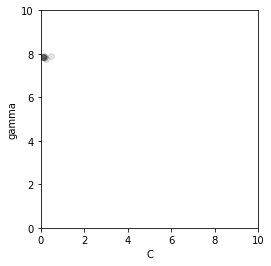

error of particle- 1 is (training, test) (4, 8)  At (gamma, c):  [0.11157991 7.8523617 ]
error of particle- 2 is (training, test) (3, 11)  At (gamma, c):  [0.23013815 7.74296685]
error of particle- 3 is (training, test) (4, 11)  At (gamma, c):  [0.14590233 7.82474916]
error of particle- 4 is (training, test) (6, 7)  At (gamma, c):  [0.10203044 7.85518393]
error of particle- 5 is (training, test) (2, 10)  At (gamma, c):  [0.46401804 7.89586405]
error of particle- 6 is (training, test) (3, 11)  At (gamma, c):  [0.18518262 7.85833083]
error of particle- 7 is (training, test) (4, 9)  At (gamma, c):  [0.11482962 7.85614712]
error of particle- 8 is (training, test) (4, 11)  At (gamma, c):  [0.13962147 7.90112951]
error of particle- 9 is (training, test) (3, 11)  At (gamma, c):  [0.15178621 7.87128211]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 14 with error (train, test): (5, 7)
iteration : 16


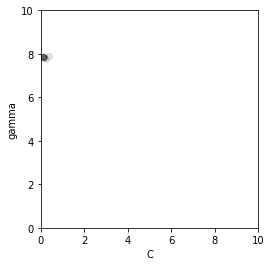

error of particle- 1 is (training, test) (4, 8)  At (gamma, c):  [0.11015893 7.85314027]
error of particle- 2 is (training, test) (3, 11)  At (gamma, c):  [0.22994736 7.74313807]
error of particle- 3 is (training, test) (4, 11)  At (gamma, c):  [0.14324599 7.82675027]
error of particle- 4 is (training, test) (6, 7)  At (gamma, c):  [0.10215424 7.85541441]
error of particle- 5 is (training, test) (2, 11)  At (gamma, c):  [0.36673707 7.88540313]
error of particle- 6 is (training, test) (3, 11)  At (gamma, c):  [0.1497448  7.85777659]
error of particle- 7 is (training, test) (4, 8)  At (gamma, c):  [0.10919735 7.85657619]
error of particle- 8 is (training, test) (4, 9)  At (gamma, c):  [0.12572452 7.88438692]
error of particle- 9 is (training, test) (4, 10)  At (gamma, c):  [0.12786524 7.86429744]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.10303057 7.85704598] in iteration number 15 with error (train, test): (5, 7)
iteration : 17


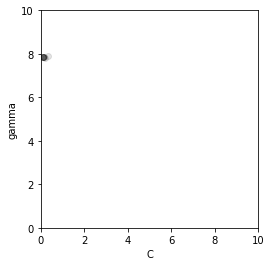

error of particle- 1 is (training, test) (4, 7)  At (gamma, c):  [0.1077785  7.85444454]
error of particle- 2 is (training, test) (3, 11)  At (gamma, c):  [0.18112297 7.786958  ]
error of particle- 3 is (training, test) (4, 9)  At (gamma, c):  [0.12584747 7.8398572 ]
error of particle- 4 is (training, test) (6, 7)  At (gamma, c):  [0.10252541 7.85610547]
error of particle- 5 is (training, test) (2, 12)  At (gamma, c):  [0.32039277 7.88041959]
error of particle- 6 is (training, test) (4, 11)  At (gamma, c):  [0.14251616 7.85766353]
error of particle- 7 is (training, test) (5, 7)  At (gamma, c):  [0.107057   7.85673924]
error of particle- 8 is (training, test) (4, 10)  At (gamma, c):  [0.11583843 7.87247647]
error of particle- 9 is (training, test) (4, 10)  At (gamma, c):  [0.11696992 7.86111612]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10303057 7.85704598]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.1077785  7.85444454] in iteration number 16 with error (train, test): (4, 7)
iteration : 18


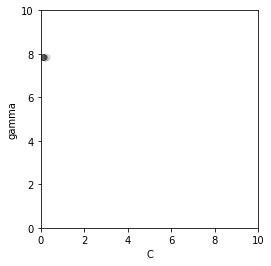

error of particle- 1 is (training, test) (4, 7)  At (gamma, c):  [0.1077785  7.85444454]
error of particle- 2 is (training, test) (3, 11)  At (gamma, c):  [0.18008423 7.78791378]
error of particle- 3 is (training, test) (4, 10)  At (gamma, c):  [0.12036366 7.84428436]
error of particle- 4 is (training, test) (5, 7)  At (gamma, c):  [0.10423858 7.8555638 ]
error of particle- 5 is (training, test) (2, 11)  At (gamma, c):  [0.28718918 7.87636311]
error of particle- 6 is (training, test) (4, 11)  At (gamma, c):  [0.13726369 7.85717681]
error of particle- 7 is (training, test) (5, 7)  At (gamma, c):  [0.10709886 7.85660612]
error of particle- 8 is (training, test) (4, 10)  At (gamma, c):  [0.11549598 7.87171034]
error of particle- 9 is (training, test) (4, 9)  At (gamma, c):  [0.11258504 7.85793336]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10369991 7.85667924]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.1077785  7.85444454] in iteration number 17 with error (train, test): (4, 7)
iteration : 19


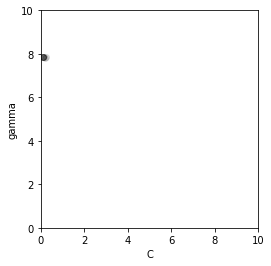

error of particle- 1 is (training, test) (4, 7)  At (gamma, c):  [0.1077785  7.85444454]
error of particle- 2 is (training, test) (3, 11)  At (gamma, c):  [0.17146546 7.79584417]
error of particle- 3 is (training, test) (4, 10)  At (gamma, c):  [0.1167315  7.84721665]
error of particle- 4 is (training, test) (5, 7)  At (gamma, c):  [0.10443348 7.85550217]
error of particle- 5 is (training, test) (3, 11)  At (gamma, c):  [0.23402872 7.86986851]
error of particle- 6 is (training, test) (4, 10)  At (gamma, c):  [0.1335758  7.85683507]
error of particle- 7 is (training, test) (4, 7)  At (gamma, c):  [0.10731396 7.85592199]
error of particle- 8 is (training, test) (4, 9)  At (gamma, c):  [0.11190952 7.86368659]
error of particle- 9 is (training, test) (4, 8)  At (gamma, c):  [0.11158013 7.85720395]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10444467 7.85627118]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position is  [0.1077785  7.85444454] in iteration number 18 with error (train, test): (4, 7)
iteration : 20


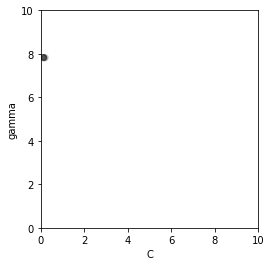

error of particle- 1 is (training, test) (4, 7)  At (gamma, c):  [0.1077785  7.85444454]
error of particle- 2 is (training, test) (3, 11)  At (gamma, c):  [0.15720969 7.80896136]
error of particle- 3 is (training, test) (4, 9)  At (gamma, c):  [0.11384084 7.84955032]
error of particle- 4 is (training, test) (5, 7)  At (gamma, c):  [0.10603632 7.85499538]
error of particle- 5 is (training, test) (3, 11)  At (gamma, c):  [0.20717406 7.86658768]
error of particle- 6 is (training, test) (4, 10)  At (gamma, c):  [0.12841005 7.85635638]
error of particle- 7 is (training, test) (4, 7)  At (gamma, c):  [0.10749032 7.85536106]
error of particle- 8 is (training, test) (4, 9)  At (gamma, c):  [0.11177617 7.86338826]
error of particle- 9 is (training, test) (4, 8)  At (gamma, c):  [0.1100776  7.85611333]
error of particle- 10 is (training, test) (5, 7)  At (gamma, c):  [0.10523031 7.85584072]
The best position is  [0.1077785  7.85444454] in iteration number 19 with error (train, test): (4, 7)
The 

In [7]:
%%time
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    print("iteration :", iteration+1)
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value[1] > fitness_cadidate[1]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
        elif(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
            
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
    
    print("The best position is ", gbest_position, "in iteration number", iteration, "with error (train, test):", fitness_function(gbest_position))    
    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number", iteration, "with error (train, test):", fitness_function(gbest_position))

Akurasi SVM dengan optimasi PSO 63.94557823129252
              precision    recall  f1-score   support

       anger       0.67      0.75      0.71       119
        fear       0.86      0.61      0.72        62
       happy       0.62      0.53      0.57       111
        love       0.79      0.76      0.78        55
     sadness       0.46      0.57      0.51        94

    accuracy                           0.64       441
   macro avg       0.68      0.65      0.66       441
weighted avg       0.66      0.64      0.64       441

[[89  1  8  0 21]
 [ 6 38  9  1  8]
 [18  1 59  5 28]
 [ 0  1  6 42  6]
 [19  3 13  5 54]]


<AxesSubplot:>

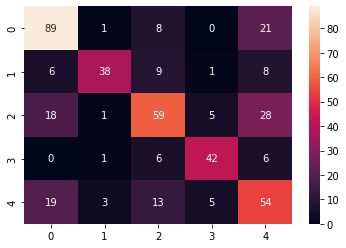

In [8]:
SVM = SVC(kernel= 'rbf', gamma= gbest_position[0], C= gbest_position[1])
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)
accuracy = accuracy_score(predictions_SVM, y_test)
print('Akurasi SVM dengan optimasi PSO', accuracy*100)

x = df['clean_data'].values.astype('U')
y = df['label'].values

encoder = LabelEncoder()
encoder.fit(y)
target_names = encoder.classes_

print(classification_report(y_test, predictions_SVM, target_names=target_names))
print(confusion_matrix(y_test, predictions_SVM, labels=[0, 1, 2, 3, 4]))

cf = confusion_matrix(y_test, predictions_SVM, labels=[0, 1, 2, 3, 4])
sns.heatmap(cf, annot=True, fmt='d')